# IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# READ DATASETS OF FACTORS AFFECTING HOME PRICES

In [2]:
GDP = pd.read_csv(r'C:\Users\hp\Downloads\archive\GDP.csv')
GDP['DATE'] = pd.to_datetime(GDP['DATE'])
GDP

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
302,2022-07-01,25994.639
303,2022-10-01,26408.405
304,2023-01-01,26813.601
305,2023-04-01,27063.012


In [3]:
Home_Price_Index = pd.read_csv(r'C:\Users\hp\Downloads\archive\Home-Price-Index.csv')
Home_Price_Index['DATE'] = pd.to_datetime(Home_Price_Index['DATE'])
Home_Price_Index

,DATE,CSUSHPISA
0,1987-01-01,63.964
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563
...,...,...
434,2023-03-01,298.396
435,2023-04-01,300.208
436,2023-05-01,302.685
437,2023-06-01,304.741


In [4]:
Mortgage = pd.read_csv(r'C:\Users\hp\Downloads\archive\Mortgage.csv')
Mortgage['DATE'] = pd.to_datetime(Mortgage['DATE'])
Mortgage

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29
...,...,...
2739,2023-09-28,7.31
2740,2023-10-05,7.49
2741,2023-10-12,7.57
2742,2023-10-19,7.63


In [5]:
Population_Growth = pd.read_csv(r'C:\Users\hp\Downloads\archive\Population-Growth.csv')
Population_Growth['DATE'] = pd.to_datetime(Population_Growth['DATE'])
Population_Growth

,DATE,SPPOPGROWUSA
0,1961-01-01,1.657730
1,1962-01-01,1.537997
2,1963-01-01,1.439165
3,1964-01-01,1.389046
4,1965-01-01,1.250172
...,...,...
57,2018-01-01,0.526435
58,2019-01-01,0.455381
59,2020-01-01,0.964348
60,2021-01-01,0.156747


In [6]:
Unemployment_Rate = pd.read_csv(r'C:\Users\hp\Downloads\archive\Unemployment-Rate.csv')
Unemployment_Rate['DATE'] = pd.to_datetime(Unemployment_Rate['DATE'])
Unemployment_Rate

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
904,2023-05-01,3.7
905,2023-06-01,3.6
906,2023-07-01,3.5
907,2023-08-01,3.8


In [7]:
Consumer_Price_Index = pd.read_csv(r'C:\Users\hp\Downloads\archive\Consumer-Price-Index.csv')
Consumer_Price_Index['DATE'] = pd.to_datetime(Consumer_Price_Index['DATE'])
Consumer_Price_Index

,DATE,CPIAUCSL
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
916,2023-05-01,303.294
917,2023-06-01,303.841
918,2023-07-01,304.348
919,2023-08-01,306.269


In [8]:
FedFunds = pd.read_csv(r'C:\Users\hp\Downloads\archive\FedFunds.csv')
FedFunds['DATE'] = pd.to_datetime(FedFunds['DATE'])
FedFunds

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
826,2023-05-01,5.06
827,2023-06-01,5.08
828,2023-07-01,5.12
829,2023-08-01,5.33


# JOIN ALL DATASETS TO GET A FINAL DATASET BASED ON DATE FIELD

In [9]:
# US_HOME_DATASET = pd.merge(GDP,Mortgage,on = 'DATE',how = 'inner')
# US_HOME_DATASET

In [10]:
US_HOME_DATASET = pd.merge(GDP,Home_Price_Index,on = 'DATE',how = 'inner')
US_HOME_DATASET

,DATE,GDP,CSUSHPISA
0,1987-01-01,4722.156,63.964
1,1987-04-01,4806.160,65.132
2,1987-07-01,4884.555,66.507
3,1987-10-01,5007.994,67.739
4,1988-01-01,5073.372,68.858
...,...,...,...
142,2022-07-01,25994.639,303.800
143,2022-10-01,26408.405,299.033
144,2023-01-01,26813.601,296.922
145,2023-04-01,27063.012,300.208


In [11]:
US_HOME_DATASET = pd.merge(US_HOME_DATASET,Unemployment_Rate,on = 'DATE',how = 'inner')
US_HOME_DATASET 

,DATE,GDP,CSUSHPISA,UNRATE
0,1987-01-01,4722.156,63.964,6.6
1,1987-04-01,4806.160,65.132,6.3
2,1987-07-01,4884.555,66.507,6.1
3,1987-10-01,5007.994,67.739,6.0
4,1988-01-01,5073.372,68.858,5.7
...,...,...,...,...
142,2022-07-01,25994.639,303.800,3.5
143,2022-10-01,26408.405,299.033,3.7
144,2023-01-01,26813.601,296.922,3.4
145,2023-04-01,27063.012,300.208,3.4


In [12]:
US_HOME_DATASET = pd.merge(US_HOME_DATASET,Consumer_Price_Index,on = 'DATE',how = 'inner')
US_HOME_DATASET

,DATE,GDP,CSUSHPISA,UNRATE,CPIAUCSL
0,1987-01-01,4722.156,63.964,6.6,111.400
1,1987-04-01,4806.160,65.132,6.3,112.700
2,1987-07-01,4884.555,66.507,6.1,113.800
3,1987-10-01,5007.994,67.739,6.0,115.000
4,1988-01-01,5073.372,68.858,5.7,116.000
...,...,...,...,...,...
142,2022-07-01,25994.639,303.800,3.5,294.628
143,2022-10-01,26408.405,299.033,3.7,297.987
144,2023-01-01,26813.601,296.922,3.4,300.536
145,2023-04-01,27063.012,300.208,3.4,302.918


In [13]:
US_HOME_DATASET = pd.merge(US_HOME_DATASET,FedFunds,on = 'DATE',how = 'inner')
US_HOME_DATASET


,DATE,GDP,CSUSHPISA,UNRATE,CPIAUCSL,FEDFUNDS
0,1987-01-01,4722.156,63.964,6.6,111.400,6.43
1,1987-04-01,4806.160,65.132,6.3,112.700,6.37
2,1987-07-01,4884.555,66.507,6.1,113.800,6.58
3,1987-10-01,5007.994,67.739,6.0,115.000,7.29
4,1988-01-01,5073.372,68.858,5.7,116.000,6.83
...,...,...,...,...,...,...
142,2022-07-01,25994.639,303.800,3.5,294.628,1.68
143,2022-10-01,26408.405,299.033,3.7,297.987,3.08
144,2023-01-01,26813.601,296.922,3.4,300.536,4.33
145,2023-04-01,27063.012,300.208,3.4,302.918,4.83


# Created Year column to join and get population growth in each year with population dataframe

In [14]:
US_HOME_DATASET['YEAR'] = US_HOME_DATASET['DATE'].dt.year

# POPULATION GROWTH OF EACH YEAR IS GIVEN THEREFORE WE NEED TO ADJUST IT IN OUR US_HOME_DATASET

In [15]:
Population_Growth['YEAR'] = Population_Growth['DATE'].dt.year

# Select only year and population growth fields

In [16]:
Population_Growth = Population_Growth.iloc[:,[1,2]]

In [17]:
US_HOME_DATASET = pd.merge(US_HOME_DATASET,Population_Growth, on = 'YEAR', how = 'inner')

# EDA ON CREATED DATASET

In [18]:
US_HOME_DATASET = US_HOME_DATASET.rename(columns = {'CSUSHPISA':'S&PCase_Schiller_Home_Price_Index','UNRATE':'Unemployment_Rate','CPIAUCSL':'Consumer_Price_Index','SPPOPGROWUSA':'Population_Growth'})

In [19]:
US_HOME_DATASET.isnull().sum()

DATE                                 0
GDP                                  0
S&PCase_Schiller_Home_Price_Index    0
Unemployment_Rate                    0
Consumer_Price_Index                 0
FEDFUNDS                             0
YEAR                                 0
Population_Growth                    0
dtype: int64

In [20]:
US_HOME_DATASET.dtypes

DATE                                 datetime64[ns]
GDP                                         float64
S&PCase_Schiller_Home_Price_Index           float64
Unemployment_Rate                           float64
Consumer_Price_Index                        float64
FEDFUNDS                                    float64
YEAR                                          int64
Population_Growth                           float64
dtype: object

In [21]:
# US_HOME_DATASET = US_HOME_DATASET.drop('YEAR',axis = 1)

In [22]:
US_HOME_DATASET

,DATE,GDP,S&PCase_Schiller_Home_Price_Index,Unemployment_Rate,Consumer_Price_Index,FEDFUNDS,YEAR,Population_Growth
0,1987-01-01,4722.156,63.964,6.6,111.400,6.43,1987,0.893829
1,1987-04-01,4806.160,65.132,6.3,112.700,6.37,1987,0.893829
2,1987-07-01,4884.555,66.507,6.1,113.800,6.58,1987,0.893829
3,1987-10-01,5007.994,67.739,6.0,115.000,7.29,1987,0.893829
4,1988-01-01,5073.372,68.858,5.7,116.000,6.83,1988,0.907999
...,...,...,...,...,...,...,...,...
139,2021-10-01,24654.603,273.855,4.5,276.522,0.08,2021,0.156747
140,2022-01-01,25029.116,285.829,4.0,282.599,0.08,2022,0.377565
141,2022-04-01,25544.273,300.569,3.6,288.611,0.33,2022,0.377565
142,2022-07-01,25994.639,303.800,3.5,294.628,1.68,2022,0.377565


# PLOT BOXPLOT FOR OUTLIER DETECTION

Text(0.5, 1.0, 'Population_Growth')

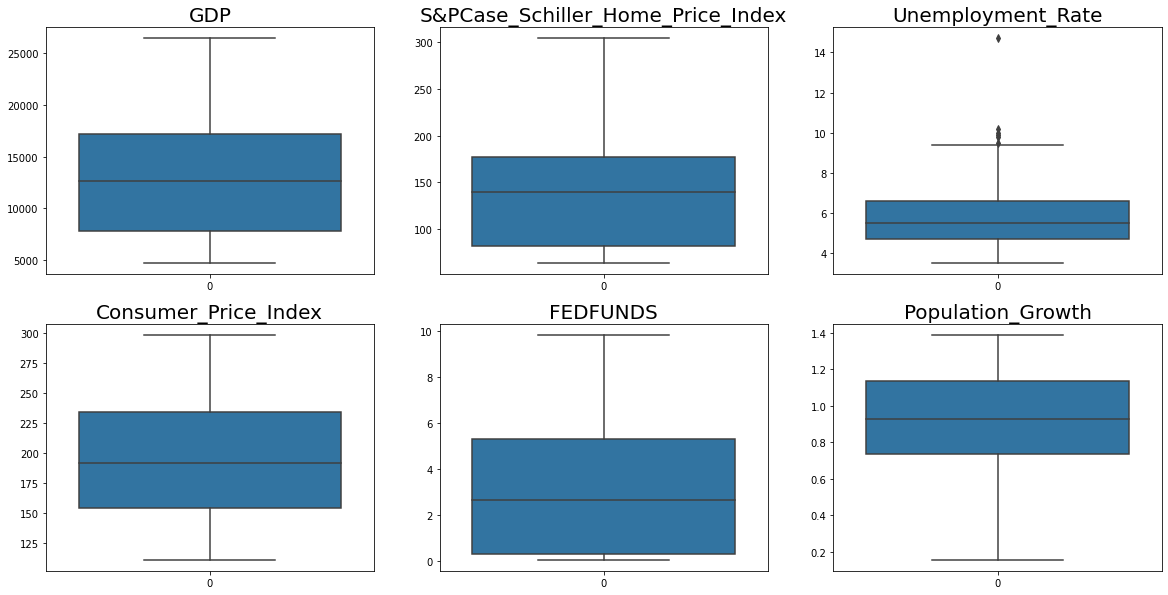

In [23]:
fig,axes = plt.subplots(2,3,figsize = (20,10))

plt.subplot(2,3,1)
sns.boxplot(US_HOME_DATASET['GDP'])
plt.title('GDP',fontsize = 20)

plt.subplot(2,3,2)
sns.boxplot(US_HOME_DATASET['S&PCase_Schiller_Home_Price_Index'])
plt.title('S&PCase_Schiller_Home_Price_Index',fontsize = 20)

plt.subplot(2,3,3)
sns.boxplot(US_HOME_DATASET['Unemployment_Rate'])
plt.title('Unemployment_Rate',fontsize = 20)

plt.subplot(2,3,4)
sns.boxplot(US_HOME_DATASET['Consumer_Price_Index'])
plt.title('Consumer_Price_Index',fontsize = 20)

plt.subplot(2,3,5)
sns.boxplot(US_HOME_DATASET['FEDFUNDS'])
plt.title('FEDFUNDS',fontsize = 20)

plt.subplot(2,3,6)
sns.boxplot(US_HOME_DATASET['Population_Growth'])
plt.title('Population_Growth',fontsize = 20)

In [24]:
Q1 = US_HOME_DATASET.Unemployment_Rate.quantile(0.25)
Q3 = US_HOME_DATASET.Unemployment_Rate.quantile(0.75)
IQR = Q3-Q1

US_HOME_DATASET = US_HOME_DATASET[~((US_HOME_DATASET['Unemployment_Rate'] < (Q1 - 1.5 * IQR)) | (US_HOME_DATASET['Unemployment_Rate'] > (Q3 + 1.5 * IQR)))]

# US_HOME_DATASET['Unemployment_Rate'] = 

In [25]:
US_HOME_DATASET

,DATE,GDP,S&PCase_Schiller_Home_Price_Index,Unemployment_Rate,Consumer_Price_Index,FEDFUNDS,YEAR,Population_Growth
0,1987-01-01,4722.156,63.964,6.6,111.400,6.43,1987,0.893829
1,1987-04-01,4806.160,65.132,6.3,112.700,6.37,1987,0.893829
2,1987-07-01,4884.555,66.507,6.1,113.800,6.58,1987,0.893829
3,1987-10-01,5007.994,67.739,6.0,115.000,7.29,1987,0.893829
4,1988-01-01,5073.372,68.858,5.7,116.000,6.83,1988,0.907999
...,...,...,...,...,...,...,...,...
139,2021-10-01,24654.603,273.855,4.5,276.522,0.08,2021,0.156747
140,2022-01-01,25029.116,285.829,4.0,282.599,0.08,2022,0.377565
141,2022-04-01,25544.273,300.569,3.6,288.611,0.33,2022,0.377565
142,2022-07-01,25994.639,303.800,3.5,294.628,1.68,2022,0.377565


# HOME PRICE INDEX FOR ALL YEARS

In [26]:
# This visual represents the change in home price index in US from year 1987 to 2023
# Price index increased till 2006 reamined constant in following year and then decreased till 2011 
# after that it followed a upward trend till 2023.

<BarContainer object of 138 artists>

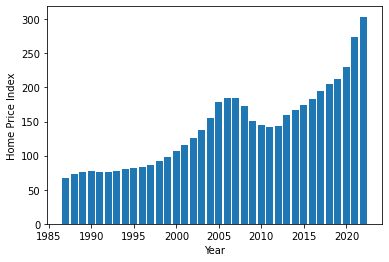

In [27]:
plt.xlabel('Year')
plt.ylabel('Home Price Index')
plt.bar(US_HOME_DATASET['YEAR'],US_HOME_DATASET['S&PCase_Schiller_Home_Price_Index'])

# CORRELATION BETWEEN ALL FEATURES 

In [28]:
corr = US_HOME_DATASET.corr()

<AxesSubplot:>

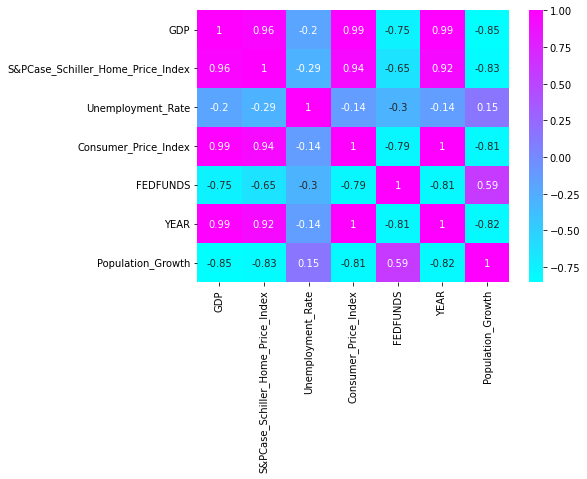

In [29]:
plt.subplots(1,1,figsize = (7,5))
sns.heatmap(corr, annot = True, cmap = 'cool')

In [30]:
# GDP, CPI have a high positive correlation with home price index
# Feedfunds and increase in population are negatively correlated with home price index indicating 
# that increase in feedfunds and population will decrease prices of home
# Unemployment rate is least correlated with home price index

# HIGHEST AND LOWEST HOME PRICE INDEX RECORDED OVER THE PERIOD OF TIME

In [31]:
HIGESH_LOWEST_HOME_PRICE_INDEX =  US_HOME_DATASET.groupby('YEAR').agg({'S&PCase_Schiller_Home_Price_Index':'max'}).reset_index()

In [32]:
HIGESH_LOWEST_HOME_PRICE_INDEX

,YEAR,S&PCase_Schiller_Home_Price_Index
0,1987,67.739
1,1988,72.635
2,1989,76.283
3,1990,77.278
4,1991,76.082
5,1992,76.375
6,1993,77.940
7,1994,80.064
8,1995,81.481
9,1996,83.376


# FOUND THE DIFFERENCE OF HOME PRICE INDEX FOR 2 CONSECUTIVE YEARS

In [33]:
my_dict = {}
for i in range(len(HIGESH_LOWEST_HOME_PRICE_INDEX) - 1):
    current_row = HIGESH_LOWEST_HOME_PRICE_INDEX.iloc[i]
    next_row = HIGESH_LOWEST_HOME_PRICE_INDEX.iloc[i + 1]

    # Perform the subtraction
    result = next_row['S&PCase_Schiller_Home_Price_Index'] - current_row['S&PCase_Schiller_Home_Price_Index']
    y = f"{next_row['YEAR']}-{current_row['YEAR']}"
    my_dict[y] = result

In [34]:
my_dict

{'1988.0-1987.0': 4.896000000000015,
 '1989.0-1988.0': 3.647999999999996,
 '1990.0-1989.0': 0.9950000000000045,
 '1991.0-1990.0': -1.1960000000000122,
 '1992.0-1991.0': 0.29300000000000637,
 '1993.0-1992.0': 1.5649999999999977,
 '1994.0-1993.0': 2.1239999999999952,
 '1995.0-1994.0': 1.4170000000000158,
 '1996.0-1995.0': 1.894999999999996,
 '1997.0-1996.0': 2.769999999999996,
 '1998.0-1997.0': 5.569999999999993,
 '1999.0-1998.0': 6.806000000000012,
 '2000.0-1999.0': 8.86,
 '2001.0-2000.0': 7.927999999999997,
 '2002.0-2001.0': 10.424999999999997,
 '2003.0-2002.0': 11.797000000000011,
 '2004.0-2003.0': 18.21799999999999,
 '2005.0-2004.0': 22.27799999999999,
 '2006.0-2005.0': 6.301000000000016,
 '2007.0-2006.0': 0.18799999999998818,
 '2008.0-2007.0': -11.384999999999991,
 '2009.0-2008.0': -21.625,
 '2010.0-2009.0': -6.515999999999991,
 '2011.0-2010.0': -3.469999999999999,
 '2012.0-2011.0': 2.0789999999999793,
 '2013.0-2012.0': 15.642000000000024,
 '2014.0-2013.0': 7.399999999999977,
 '2015

# FOUND MAXIMUM DIFFERENCE IN HPI BETWEEN YEAR 2020-2021 AND MINIMUM BETWEEN YEAR 2006-2007. 
#From here we can get that year 2022 has highest HPI - 303.8 and year 1987 has minimum HPI - 67.7

# HIGHEST AND LOWEST UNEMPLOYMENT RATE IN GIVEN YEARS

In [35]:
HIGESH_LOWEST_Unemployment_Rate =  US_HOME_DATASET.groupby('YEAR').agg({'Unemployment_Rate':'max'}).reset_index()

In [36]:
HIGESH_LOWEST_Unemployment_Rate

,YEAR,Unemployment_Rate
0,1987,6.6
1,1988,5.7
2,1989,5.4
3,1990,5.9
4,1991,7.0
5,1992,7.7
6,1993,7.3
7,1994,6.6
8,1995,5.8
9,1996,5.6


In [44]:
US_HOME_DATASET

,DATE,GDP,S&PCase_Schiller_Home_Price_Index,Unemployment_Rate,Consumer_Price_Index,FEDFUNDS,YEAR,Population_Growth
0,1987-01-01,4722.156,63.964,6.6,111.400,6.43,1987,0.893829
1,1987-04-01,4806.160,65.132,6.3,112.700,6.37,1987,0.893829
2,1987-07-01,4884.555,66.507,6.1,113.800,6.58,1987,0.893829
3,1987-10-01,5007.994,67.739,6.0,115.000,7.29,1987,0.893829
4,1988-01-01,5073.372,68.858,5.7,116.000,6.83,1988,0.907999
...,...,...,...,...,...,...,...,...
139,2021-10-01,24654.603,273.855,4.5,276.522,0.08,2021,0.156747
140,2022-01-01,25029.116,285.829,4.0,282.599,0.08,2022,0.377565
141,2022-04-01,25544.273,300.569,3.6,288.611,0.33,2022,0.377565
142,2022-07-01,25994.639,303.800,3.5,294.628,1.68,2022,0.377565


In [37]:
# From here we can observe that  unemployment rate was highest in year - 2010 and lowest - 2022

In [38]:
# plt.xlabel('Home Price Index')
# plt.ylabel('Unemployment_Rate')
# plt.bar(US_HOME_DATASET['S&PCase_Schiller_Home_Price_Index'],US_HOME_DATASET['Unemployment_Rate'])

In [39]:
x = US_HOME_DATASET.drop(['S&PCase_Schiller_Home_Price_Index','YEAR','DATE'], axis=1)
y = US_HOME_DATASET['S&PCase_Schiller_Home_Price_Index']
y = pd.DataFrame(y)

In [40]:
y

,S&PCase_Schiller_Home_Price_Index
0,63.964
1,65.132
2,66.507
3,67.739
4,68.858
...,...
139,273.855
140,285.829
141,300.569
142,303.800


# USING ESTIMATOR OBJECTS AND RANDOM FOREST REGRESSOR BUILT A MODEL AS ALL DATA WAS IN INT OR FLOAT TYPE

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
estimator = RandomForestRegressor()


# estimator.fit(x_train, y_train)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(x_train, y_train)
selected_features = selector.support_

print("Selected Features:")
for feature, is_selected in zip(x.columns, selected_features):
    if is_selected:
        print(feature)

x_train_selected = x_train.loc[:, selected_features]
x_test_selected = x_test.loc[:, selected_features]

estimator.fit(x_train_selected, y_train)
y_pred = estimator.predict(x_test_selected)

Selected Features:
GDP
Unemployment_Rate
Consumer_Price_Index
FEDFUNDS
Population_Growth


C:\Users\hp\anaconda3\envs\env_Aar\lib\site-packages\sklearn\feature_selection\_rfe.py:323: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X[:, features], y, **fit_params)
C:\Users\hp\AppData\Local\Temp\ipykernel_3624\601000380.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(x_train_selected, y_train)


In [42]:
y_pred = estimator.predict(x_test)


# PREDICTED THE HOME PRICE INDEX AND USED MEAN SQUARED ERROR, R2 SQUARE FOR MEASUREMENT OF MODEL 

In [43]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Mean Squared Error (MSE): 5.312143272860945
R2 Score: 0.9981307926597729
